# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base_url in farenheit
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Loop through cities making the API call
i = 1
for city in cities:
    city=city
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City name not available.")

Processing record 1|puerto ayora
Processing record 2|dikson
Processing record 3|rikitea
City name not available.
City name not available.
Processing record 4|bluff
Processing record 5|touros
Processing record 6|ushuaia
Processing record 7|mataura
Processing record 8|georgetown
Processing record 9|sicuani
Processing record 10|ewa beach
Processing record 11|thompson
Processing record 12|port hedland
Processing record 13|grindavik
Processing record 14|hermanus
Processing record 15|jamestown
Processing record 16|nantucket
Processing record 17|mount isa
Processing record 18|seoul
City name not available.
Processing record 19|new norfolk
Processing record 20|mizur
Processing record 21|kapaa
Processing record 22|carnarvon
City name not available.
Processing record 23|busselton
Processing record 24|taunggyi
Processing record 25|iwamizawa
City name not available.
Processing record 26|mahebourg
Processing record 27|klaksvik
Processing record 28|tazovskiy
Processing record 29|bengkulu
Processing 

City name not available.
Processing record 249|kavaratti
Processing record 250|port alfred
Processing record 251|awjilah
Processing record 252|lompoc
City name not available.
Processing record 253|kudahuvadhoo
City name not available.
Processing record 254|tokur
Processing record 255|yamaranguila
Processing record 256|asau
Processing record 257|saskylakh
Processing record 258|tres arroyos
Processing record 259|ambon
Processing record 260|amazar
Processing record 261|mayskiy
Processing record 262|kruisfontein
City name not available.
City name not available.
Processing record 263|husavik
Processing record 264|srivardhan
Processing record 265|lumding
Processing record 266|axim
Processing record 267|itarema
Processing record 268|iwaki
Processing record 269|bismil
City name not available.
Processing record 270|chuy
Processing record 271|hualmay
Processing record 272|sitka
Processing record 273|le creusot
Processing record 274|santa rosa
Processing record 275|pascagoula
Processing record 27

Processing record 493|ternate
Processing record 494|namie
Processing record 495|timbiqui
Processing record 496|chicama
Processing record 497|srednekolymsk
Processing record 498|chandler
Processing record 499|bilibino
Processing record 500|kangaatsiaq
Processing record 501|bharatpur
Processing record 502|sinop
Processing record 503|pafos
Processing record 504|sao jose da coroa grande
Processing record 505|iracoubo
Processing record 506|kandi
Processing record 507|ponazyrevo
Processing record 508|berbera
Processing record 509|mugur-aksy
Processing record 510|nakasongola
Processing record 511|san quintin
Processing record 512|novobiryusinskiy
Processing record 513|kraslava
Processing record 514|nagua
Processing record 515|maua
Processing record 516|carballo
City name not available.
Processing record 517|bubaque
Processing record 518|pinawa
Processing record 519|roma
City name not available.
Processing record 520|kaeo
Processing record 521|shangrao
Processing record 522|doka
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({"City": city_name, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

In [5]:
city_df.to_csv("city_list.csv")

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Puerto Ayora,98,EC,1597361714,95,-0.74,-90.35,66.99,1.01
1,Dikson,81,RU,1597361714,87,73.51,80.55,46.26,3.71
2,Rikitea,2,PF,1597361714,68,-23.12,-134.97,70.14,11.14
3,Bluff,40,NZ,1597361715,67,-46.60,168.33,45.00,5.01
4,Touros,20,BR,1597361716,83,-5.20,-35.46,75.20,6.93


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_city = city_df.loc[city_df["Humidity"] > 100]
humid_city

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [21]:
# format the date

timestamp = city_df["Date"][0]
formatted_timestamp = pd.to_datetime(timestamp, unit='s')

time.strftime("%x", formatted_timestamp())

TypeError: 'Timestamp' object is not callable

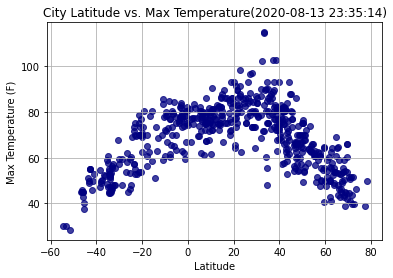

In [17]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({formatted_timestamp})")
plt.savefig("Lat_vs_Temp_plot")
plt.show()

## Latitude vs. Humidity Plot

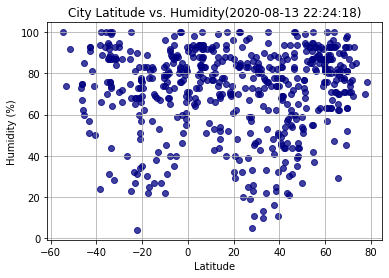

In [12]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity({formatted_timestamp})")
plt.savefig("Lat_vs_Humidity_plot")
plt.show()

## Latitude vs. Cloudiness Plot

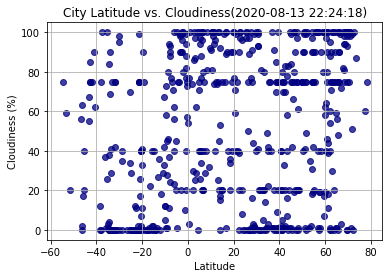

In [16]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness({formatted_timestamp})")
plt.savefig("Lat_vs_Cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

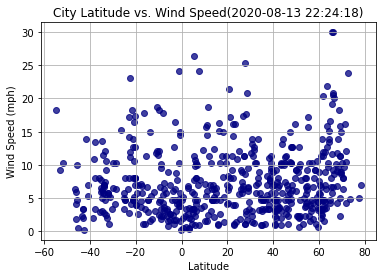

In [15]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed({formatted_timestamp})")
plt.savefig("Lat_vs_WindSpeed_plot")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression